In [7]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST(root="", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST(root="", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))
trainset = torch.utils.data.DataLoader (train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader (test, batch_size=10, shuffle=True)

In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:
class Net (nn.Module):
    
    def __init__(self):
        super().__init__()   
        self.fc1 = nn.Linear(28*28, 64)  # (fc1_input, fc1_output: any number, here 64)
        self.fc2 = nn.Linear(64, 64)     # (fc1_output, fc2_output: any number, here 64)
        self.fc3 = nn.Linear(64, 64)     # (fc2_output, f3_output: any number, here 64)
        self.fc4 = nn.Linear(64, 10)     # (fc3_output, f4_output: for 10 classes, 0 to 9 digit)

    # Now, we need to pass the data into the neural network.
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)  # axis = 1, outout layer=1

# Define the network now.
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [10]:
x = torch.rand((28, 28)) # random data

In [11]:
x = torch.rand((28, 28))
x = x.view(-1, 28*28)
output = net(x)
print(output)

tensor([[-2.2411, -2.2438, -2.3207, -2.1800, -2.2769, -2.3699, -2.2608, -2.3806,
         -2.3964, -2.3809]], grad_fn=<LogSoftmaxBackward0>)


In [14]:
import torch.optim as optim
# net.parameters(): Corresponds to every parameter that is adjustable in our model.
# lr: learning rate
optimizer = optim.Adam(net.parameters(), lr=0.001)
# The full path of input data through the model is called epoch.
EPOCHS = 3
for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of feature sets and labels (targets).
        # unpack data into x, y containers
        x, y = data
        print ('x[0]:', x[0])
        print ('y[0]:', y[0])
        break

x[0]: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0

In [18]:
# Clear code from above.
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.001)
EPOCHS = 3
for epoch in range(EPOCHS):
    for data in trainset: # trainset separate with batch_size = 10
        # data is a batch of feature sets and labels (targets).
        X, y = data  # data is batch_size = 10
        net.zero_grad()   # Every time we pass in data, we zero the gradient.
        # We paritally pass in min-batch of data due to hardware resource GPU, memory.
        output = net(X.view(-1, 28*28))  # pass in flatten data
        # nll_loss: Negative Log-Likelihood Loss between predict and label y.
        # one-hot vector: [0, 1, 0, 0]. Here, use one-hot for singular digit.
        loss = F.nll_loss(output, y) 
        loss.backward() # This is PyTorch iterate backpropagate do for us.
        optimizer.step() # after propagation, we step forward.
    print('loss:', loss)

loss: tensor(0.2329, grad_fn=<NllLossBackward0>)
loss: tensor(0.0060, grad_fn=<NllLossBackward0>)
loss: tensor(0.0659, grad_fn=<NllLossBackward0>)


In [23]:
correct = 0
total = 0
with torch.no_grad(): # Old PyTorch: net.train() or net.eval()
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))  # 784 = 28 * 28
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy:", round(correct/total, 3))

Accuracy: 0.991


In [24]:
print('X:', X)

X: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ...,

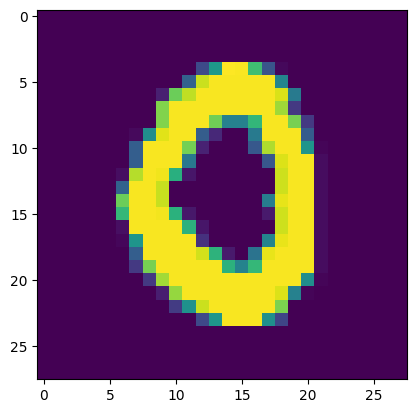

In [27]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [29]:
print(torch.argmax(net(X[0].view(-1, 784))[0]))

tensor(0)


In [34]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view(28,28))
plt.show()
print(torch.argmax(net(X[1].view(-1, 784))[0]))

tensor(7)


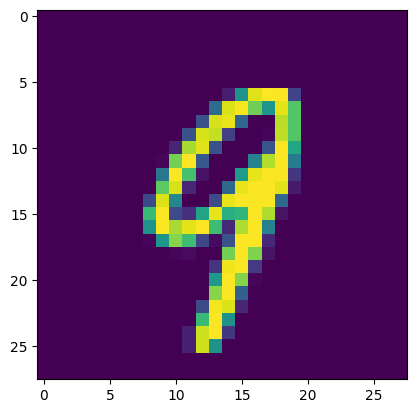

tensor(9)


In [35]:
import matplotlib.pyplot as plt
plt.imshow(X[2].view(28,28))
plt.show()
print(torch.argmax(net(X[2].view(-1, 784))[0]))

In [36]:
import matplotlib.pyplot as plt
plt.imshow(X[3].view(28,28))
plt.show()
print(torch.argmax(net(X[3].view(-1, 784))[0]))

tensor(3)
